In [50]:
net_100_mobile = ['1253.103971	2417.128325	4878.540516	7423.141241	12565.24086']
net_100_mobile = [float(i) for i in net_100_mobile[0].split('\t')]
net_256_mobile = ['533.1625938	1019.297361	1940.335751	2941.366196	5036.180735']
net_256_mobile = [float(i) for i in net_256_mobile[0].split('\t')]
net_500_mobile = ['302.3452759	532.1204662	995.6543446	1542.023659	2661.108255']
net_500_mobile = [float(i) for i in net_500_mobile[0].split('\t')]
net_1000_mobile = ['189.76	355.64	541.73	862.21	1505.97']
net_1000_mobile = [float(i) for i in net_1000_mobile[0].split('\t')]
net_100_resnet = ['389.8801804	707.5221539	1171.992302	2281.453609	3083.971739	5950.252771']
net_100_resnet = [float(i) for i in net_100_resnet[0].split('\t')]
net_256_resnet = ['206.3024044	336.8675709	521.9171047	967.6454067	1233.781576	2383.647203']
net_256_resnet = [float(i) for i in net_256_resnet[0].split('\t')]
net_500_resnet = ['148.7762928	219.1696167	314.7864342	541.1322117	656.594038	1293.100595']
net_500_resnet = [float(i) for i in net_500_resnet[0].split('\t')]
net_1000_resnet = ['119.00	161.79	216.48	334.55	372.66	705.89']
net_1000_resnet = [float(i) for i in net_1000_resnet[0].split('\t')]

raw_25 = [783.52,336.61,225.39,169.12]
raw_75 = [1687.92,852.18,600.57,464.6]
raw_100 = [16734.33,6676.65,3581.95,1973.04]

raw_25 = [float(i) for i in raw_25]
raw_75 = [float(i) for i in raw_75]
raw_100 = [float(i) for i in raw_100]

net_list = [net_100_mobile, net_256_mobile, net_500_mobile, net_1000_mobile, net_100_resnet, net_256_resnet, net_500_resnet, net_1000_resnet]
net_list2 = [raw_25, raw_75, raw_100]

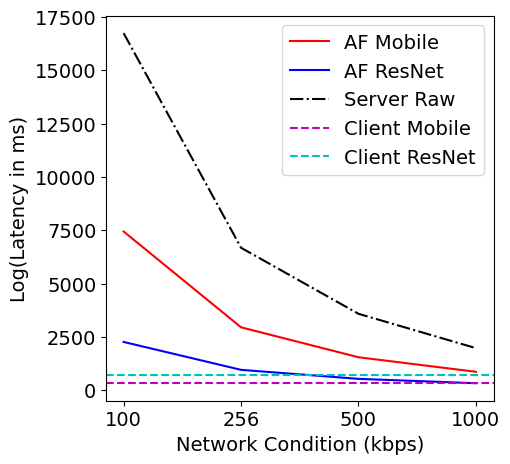

In [51]:
freq_resnet = [0, 6,45, 492,56, 1]
freq_mobile = [0, 0, 0, 598, 2]

# x axis is the network condition, y axis is the latency
import matplotlib.pyplot as plt
import numpy as np
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
x = np.array([1, 2, 3, 4])
lat_list_mobile = [np.inner(np.array(x), np.array(freq_mobile)) for x in net_list if len(x) == 5]
lat_list_resnet = [np.inner(np.array(x), np.array(freq_resnet)) for x in net_list if len(x) == 6]
lat_list_mobile = [x/600 for x in lat_list_mobile]
lat_list_resnet = [x/600 for x in lat_list_resnet]

y_m = [324, 706]
# lat_list_mobile = np.log(lat_list_mobile)
# lat_list_resnet = np.log(lat_list_resnet)
# raw_25 = np.log(raw_25)
# raw_75 = np.log(raw_75)
# raw_100 = np.log(raw_100)
# y_m = np.log(y_m)

plt.figure(figsize=(5, 5))
plt.plot(lat_list_mobile, label='AF Mobile', color='r')
plt.plot(lat_list_resnet, label='AF ResNet', color='b')

# plt.plot([0,1,2,3], raw_25, label='Server JPEG25', linestyle='-.', color='g')
# plt.plot([0,1,2,3], raw_75, label='Server JPEG75', linestyle='-.', color='y')
plt.plot([0,1,2,3], raw_100, label='Server Raw', linestyle='-.', color='k')

plt.xticks(np.arange(4), ['100', '256', '500', '1000'], fontsize=14)
plt.xlabel('Network Condition (kbps)', fontsize=14)
plt.ylabel('Log(Latency in ms)', fontsize=14)

# m imagenet latency
plt.axhline(y=y_m[0], linestyle="--", label="Client Mobile", color='m')
plt.axhline(y=y_m[1], linestyle="--", label="Client ResNet", color='c')
plt.legend(fontsize=14)
plt.yticks(fontsize=14)

# plot raw

plt.savefig('./Plots/latency_vs_network_condition.pdf', bbox_inches='tight')